In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('sample_data/drive')

Mounted at sample_data/drive


In [ ]:
!unzip "sample_data/drive/MyDrive/Colab Notebooks/Lab_3/flowers6.zip"  -d "sample_data/drive/MyDrive/Colab Notebooks/Lab_3"

Archive:  sample_data/drive/MyDrive/Colab Notebooks/Lab_3/flowers6.zip
replace sample_data/drive/MyDrive/Colab Notebooks/Lab_3/flowers6/test/buttercup/image_1194.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
batch_size_train = 32
batch_size_test = 32
learning_rate = .006
epochs = 100

In [3]:
train_dir = "sample_data/drive/MyDrive/Colab Notebooks/Lab_3/flowers6/train"
test_dir = "sample_data/drive/MyDrive/Colab Notebooks/Lab_3/flowers6/test"

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485,0.456,0.406),
                                                            (0.229,0.224,0.225))])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485,0.456,0.406),
                                                            (0.229,0.224,0.225))])

train_data = datasets.ImageFolder(train_dir, transform = train_transforms)
test_data = datasets.ImageFolder(test_dir, transform = test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size_train, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size_test, shuffle = True)

In [4]:
class CNN(nn.Module):

  def __init__(self):
      super().__init__()

      self.conv1 = nn.Sequential(
          nn.Conv2d(3,64, kernel_size = 3, padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(2),
      )

      self.conv2 = nn.Sequential(
          nn.Conv2d(64,128, kernel_size = 3, padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(2),
      )

      self.conv3 = nn.Sequential(
          nn.Conv2d(128,256, kernel_size = 3, padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(2),
      )


      self.conv4 = nn.Sequential(
          nn.Conv2d(256,512, kernel_size = 3, padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(2),
      )

      self.fc = nn.Sequential( 
          nn.Linear(14*14*512, 1000),
          nn.ReLU(inplace = True),
          nn.Linear(1000,1000),
          nn.ReLU(inplace = True),
          nn.Linear(1000,6),
      )

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = x.view(x.size(0), -1)
    x = self.fc(x)
    return x

In [5]:
device = torch.device('cuda:0')
net = CNN().to(device)

print(net)
optimizer = optim.SGD(net.parameters(), lr = learning_rate, momentum = .9)
criteon = nn.CrossEntropyLoss().to(device)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=100352, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1000, out_features=1000, bias=True)
    (

In [6]:
for epoch in range(epochs):
  train_loss = 0
  train_acc = 0

  for data, target in train_loader:

    data, target = data.to(device), target.to(device)
    logits = net(data)
    loss = criteon(logits, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,pred = logits.max(1)
    num_correct = (pred==target).sum().item()
    acc = num_correct / data.shape[0]
    train_acc += acc
    train_loss += loss.data

  print("Train Epoch: {} Loss: {:.6f} Training Accuracy {:.6f}".format(epoch+1, train_loss/len(train_loader), train_acc/len(train_loader)))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 1 Loss: 1.787632 Training Accuracy 0.186688
Train Epoch: 2 Loss: 1.737386 Training Accuracy 0.358360
Train Epoch: 3 Loss: 1.391102 Training Accuracy 0.359781
Train Epoch: 4 Loss: 1.311032 Training Accuracy 0.383117
Train Epoch: 5 Loss: 1.219138 Training Accuracy 0.388596
Train Epoch: 6 Loss: 1.155427 Training Accuracy 0.461242
Train Epoch: 7 Loss: 1.223086 Training Accuracy 0.462054
Train Epoch: 8 Loss: 1.243663 Training Accuracy 0.436485
Train Epoch: 9 Loss: 1.011380 Training Accuracy 0.540990
Train Epoch: 10 Loss: 1.107696 Training Accuracy 0.509943
Train Epoch: 11 Loss: 0.927240 Training Accuracy 0.584010
Train Epoch: 12 Loss: 0.828141 Training Accuracy 0.630682
Train Epoch: 13 Loss: 0.833163 Training Accuracy 0.627841
Train Epoch: 14 Loss: 0.793864 Training Accuracy 0.663352
Train Epoch: 15 Loss: 0.765739 Training Accuracy 0.661323
Train Epoch: 16 Loss: 0.679900 Training Accuracy 0.681818
Train Epoch: 17 Loss: 0.678440 Training Accuracy 0.683644
Train Epoch: 18 Loss: 0

In [7]:
correct = 0
net.eval()
for data, target in test_loader:
  data, target = data.to(device), target.cuda()
  logits = net(data)

  pred = logits.argmax(dim = 1)
  correct += pred.eq(target).float().sum().item()

total_num = len(test_loader.dataset)
acc = correct / total_num
print('Test Accuracy: ', acc)

Test Accuracy:  0.8809523809523809


In [8]:
import numpy as np

def plot_image(img, prediction, label):
  
  fig = plt.figure()
  for i in range(6):
    plt.imshow(np.transpose(img[i].reshape((3,224,224)), (1,2,0)))
    plt.title("Prediction = {} Label = {}".format(prediction[i].item(), label[i].item()))
    plt.show()

In [9]:
inv_normalize = transforms.Normalize(
    mean = [-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std = [1/0.229, 1/0.224, 1/0.255]
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


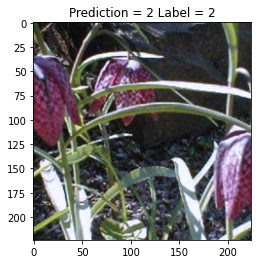

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


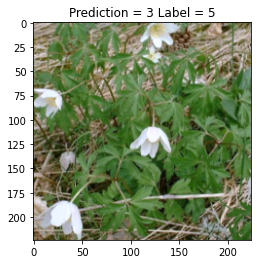

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


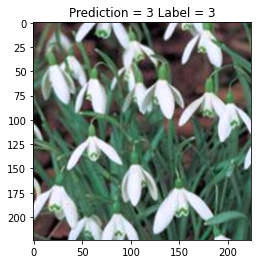

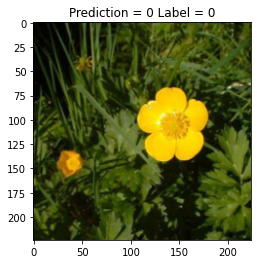

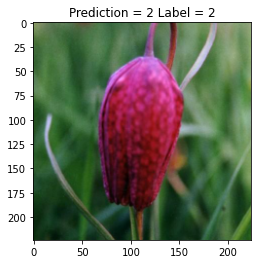

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


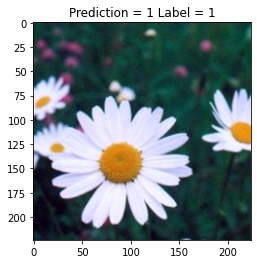

In [10]:
x, y = next(iter(test_loader))
x, y = x.to(device), y.cuda()
out = net(x)
pred = out.argmax(dim = 1)
x = inv_normalize(x)
plot_image(x.detach().cpu().numpy(), pred, y)